<a href="https://colab.research.google.com/github/Harshavalmiki/258-Deep-learning/blob/main/A5_Part_A_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1 - Numpy


## Assignment Description
Write  a colab  numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons.




### References Used
1.  [deep_learning_fundamentals_part1.ipynb](https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing&authuser=1#scrollTo=EGkS6nN6dQaz)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
def generate_data():
    n, d = 100, 3
    x = np.random.uniform(-1, 1, (n, d))
    weights_true = np.array([[5, 2, 2],]).T
    bias_true = np.array([1])
    # Creating an equation for y_true using NumPy einsum
    y_true = (
        np.einsum('ij,jk->ik', x ** 3, weights_true) +
        np.einsum('ij,jk->ik', x ** 2, weights_true) +
        np.einsum('ij,jk->ik', x, weights_true) +
        bias_true
    )
    y_true = y_true.flatten()
    return x, y_true

In [46]:
# Activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# NumPy einsum implementation
def einsum(subscripts, *operands):
    return np.einsum(subscripts, *operands)

## Neural Network Class

In [47]:
# Neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.einsum('ij,jk->ik', X, self.W1) + self.b1
        self.A1 = tanh(self.Z1)
        self.Z2 = np.einsum('ij,jk->ik', self.A1, self.W2) + self.b2
        self.A2 = self.Z2
        return self.A2

    def backward(self, X, y, output):
        m = y.shape[0]
        dZ2 = output - y
        dW2 = np.einsum('ji,jk->ik', self.A1, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.einsum('ij,kj->ik', dZ2, self.W2.T) * tanh_derivative(self.Z1)
        dW1 = np.einsum('ji,jk->ik', X, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        return dW1, db1, dW2, db2

    def update_weights(self, dW1, db1, dW2, db2, learning_rate):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

# Training The NN


In [48]:
# Training the neural network
def train(X, y, hidden_size, learning_rate, epochs):
    input_size = 3
    output_size = 1
    nn = NeuralNetwork(input_size, hidden_size, output_size)

    loss_history = []  # Store the loss values at each epoch

    for i in range(epochs):
        output = nn.forward(X)
        loss = np.mean((output - y) ** 2)
        dW1, db1, dW2, db2 = nn.backward(X, y, output)
        nn.update_weights(dW1, db1, dW2, db2, learning_rate)
        loss_history.append(loss)  # Append the loss value to the loss_history list
        print(f"Epoch {i}: Loss = {loss}")

    return nn, loss_history

#Synthetic Data

In [49]:
# Generate synthetic data
x, y = generate_data()
X = x  # Use x directly as the input data
y = y.reshape(-1, 1)

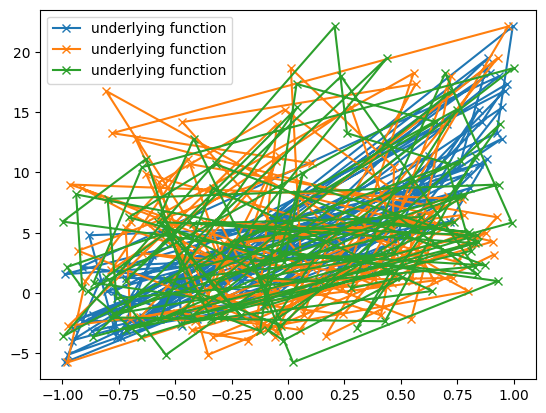

In [50]:
plt.plot(x, y, marker='x', label='underlying function')
plt.legend()

### Train Neural Network

In [53]:
# Train the neural network
hidden_size = 5
learning_rate = 0.05
epochs = 500
nn, loss_history = train(X, y, hidden_size, learning_rate, epochs)

Epoch 0: Loss = 46.63466993044819
Epoch 1: Loss = 42.53899027249615
Epoch 2: Loss = 39.200898591385965
Epoch 3: Loss = 35.61658615901358
Epoch 4: Loss = 31.213838405366616
Epoch 5: Loss = 26.928310525892925
Epoch 6: Loss = 23.4049129738176
Epoch 7: Loss = 20.585642291011048
Epoch 8: Loss = 18.30344137509846
Epoch 9: Loss = 16.4527187864286
Epoch 10: Loss = 14.956849726835499
Epoch 11: Loss = 13.74542989761692
Epoch 12: Loss = 12.753643420143161
Epoch 13: Loss = 11.92569066271353
Epoch 14: Loss = 11.216738623967462
Epoch 15: Loss = 10.593156190998815
Epoch 16: Loss = 10.03158233524656
Epoch 17: Loss = 9.517238762799808
Epoch 18: Loss = 9.041752509614954
Epoch 19: Loss = 8.600808844899772
Epoch 20: Loss = 8.192069841203116
Epoch 21: Loss = 7.813733707090164
Epoch 22: Loss = 7.463843796959889
Epoch 23: Loss = 7.140170340794782
Epoch 24: Loss = 6.84036468355509
Epoch 25: Loss = 6.562146014385465
Epoch 26: Loss = 6.303415340180942
Epoch 27: Loss = 6.062292627258788
Epoch 28: Loss = 5.837109

### Test

In [54]:
# Test the trained network
test_x1 = np.linspace(-1, 1, 10)
test_x2 = np.linspace(-1, 1, 10)
test_x3 = np.linspace(-1, 1, 10)
test_X = np.array(np.meshgrid(test_x1, test_x2, test_x3)).T.reshape(-1, 3)
predicted_y = nn.forward(test_X)

##Visualizations

Text(0.5, 1.0, 'Training Loss')

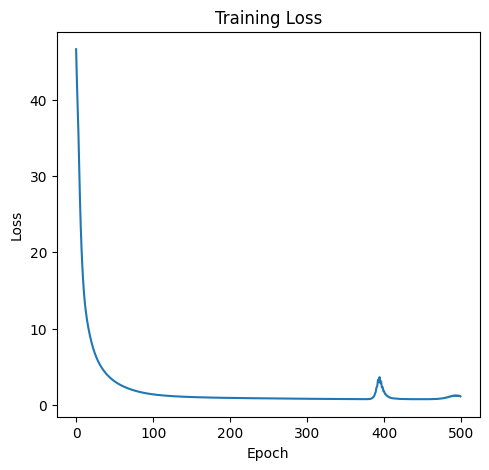

In [55]:
# Plot the results
fig = plt.figure(figsize=(12, 5))

# Plot the loss curve
ax1 = fig.add_subplot(121)
ax1.plot(loss_history)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')

### 4D-Plot

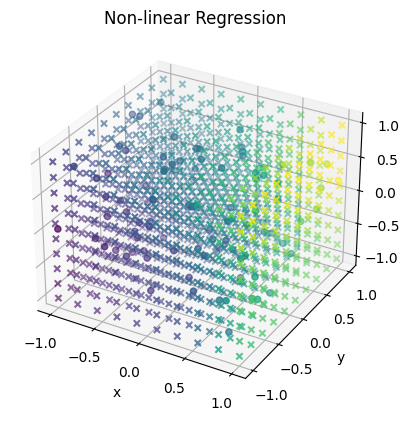

In [58]:
# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap='viridis')
ax.scatter(test_X[:, 0], test_X[:, 1], test_X[:, 2], c=predicted_y, cmap='viridis', marker='x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Non-linear Regression')
plt.show()